<a href="https://colab.research.google.com/github/DanielRaiicHu/TelecomX/blob/main/TelecomX.ipynb?forceRefresh=true">
  <img src="https://drive.google.com/uc?export=view&id=191Woxwut0iaIL2hCcCIeXRSB6oba_88H" alt="Abrir en Colab" width="120"/>
</a>

# **Proyecto: Telecom X**

Investigar y detectar patrones asociados a la evasión de clientes (churn) en Telecom X, utilizando análisis exploratorio de datos para entender el perfil y comportamiento de los clientes que abandonan la empresa.

## **Archivo del proyecto**

https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json

Exploración básica
```
df.shape           # Dimensiones del DataFrame
df.columns         # Lista de nombres de columnas
df.head()          # Primeras 5 filas
df.info()          # Resumen de tipos de datos y valores nulos
df.describe()      # Estadísticas numéricas (si hay números)
df.dtypes          # Tipo de dato por columna
df.isnull().sum()  # Conteo de valores nulos por columna
```



## **Extracción de datos**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### **Leyendo los datos**

In [3]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

In [4]:
df = pd.read_json(url)

In [5]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


### **Normalizando el dataframe**

Debemos normalizar el dataframe ya que presenta información anidada.
Sobreescribiremos el dataframe.

In [6]:
# Normalizo cada una de las columnas que contienen diccionarios
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])

# Concateno las columnas con las columnas normalizadas en el dataframe
df = pd.concat([df[['customerID', 'Churn']], df_customer, df_phone, df_internet, df_account], axis=1)
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## **Análisis de los datos**

In [7]:
# Dimensiones del Datafrane
df.shape

(7267, 21)

In [8]:
# Las columnas que tenemos en el dataframe
df.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [9]:
# Para ver la información relevante y tipos de datos de las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [10]:
# Revisión de datos únicos para cada columna
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"Valores únicos en '{col}':")
        print(df[col].unique())
        print("—" * 40)

Valores únicos en 'customerID':
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
————————————————————————————————————————
Valores únicos en 'Churn':
['No' 'Yes' '']
————————————————————————————————————————
Valores únicos en 'gender':
['Female' 'Male']
————————————————————————————————————————
Valores únicos en 'Partner':
['Yes' 'No']
————————————————————————————————————————
Valores únicos en 'Dependents':
['Yes' 'No']
————————————————————————————————————————
Valores únicos en 'PhoneService':
['Yes' 'No']
————————————————————————————————————————
Valores únicos en 'MultipleLines':
['No' 'Yes' 'No phone service']
————————————————————————————————————————
Valores únicos en 'InternetService':
['DSL' 'Fiber optic' 'No']
————————————————————————————————————————
Valores únicos en 'OnlineSecurity':
['No' 'Yes' 'No internet service']
————————————————————————————————————————
Valores únicos en 'OnlineBackup':
['Yes' 'No' 'No internet service']
————————————————————

In [11]:
# Analizando datos
df['Charges.Total'][0]

'593.3'

In [12]:
# Tipos de datos
type(df['SeniorCitizen'][0])

numpy.int64

In [13]:
# Ver las filas con el campo en blanco en la columna Churn
df[df['Churn'] == '']

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.3
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.1
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.2
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.2
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.9


In [14]:
# Cantidad de campos en blanco en la columna de Churn
(df['Churn'] == '').sum()

np.int64(224)

### **Análisis y decisiones sobre la limpieza de datos**

Tras revisar individualmente cada columna del conjunto de datos, se llegaron a las siguientes conclusiones:

* Columnas binarias (`'Partner'`, `'Dependents'`, `'PhoneService'` y `'PaperlessBilling'`) utilizan los valores `'Yes'` y `'No'`. Aunque podrían transformarse a booleanos (`True/False`) para facilitar operaciones lógicas o modelado, en este análisis se decidió mantener su formato original para favorecer la legibilidad.

* La columna `'SeniorCitizen'`, a diferencia de las anteriores, utiliza valores `0` y `1` de tipo `int64`. Para mantener un formato coherente con las demás variables binarias, se optó por **reemplazar 0 por** `'No'` **y 1 por**` 'Yes'`, y convertir la columna a tipo **string**.

* En la columna `'Churn'`, que indica si un cliente dejó o no la empresa, se detectaron tres valores únicos: `'Yes'`, `'No'` y `''` (cadena vacía). Dado que el valor vacío representa un estado indefinido, se decidió **eliminar estas filas para evitar inconsistencias analíticas**. El total de filas a eliminar es de **224**.

* Finalmente, la columna `'Charges.Total'`, que originalmente estaba en formato `object`, será convertida a `float64`, ya que contiene datos numéricos necesarios para cálculos posteriores.

---
---
**Ya que los datos están en inglés, se decidió hacer una modificación a los nombres de las columnas para mayor legibilidad**

| Nombre original       | Nuevo nombre       |
|------------------------|--------------------------|
| customerID             | ID_Cliente               |
| Churn                  | Evasion                 |
| gender                 | Genero                   |
| SeniorCitizen          | AdultoMayor              |
| Partner                | TienePareja              |
| Dependents             | Dependientes             |
| tenure                 | MesesAntiguedad          |
| PhoneService           | ServicioTelefonico       |
| MultipleLines          | LineasMultiples          |
| InternetService        | ServicioInternet         |
| OnlineSecurity         | SeguridadEnLinea         |
| OnlineBackup           | RespaldoEnLinea          |
| DeviceProtection       | ProteccionDispositivo    |
| TechSupport            | SoporteTecnico           |
| StreamingTV            | StreamingTV              |
| StreamingMovies        | StreamingPeliculas       |
| Contract               | TipoContrato             |
| PaperlessBilling       | FacturaElectronica       |
| PaymentMethod          | MetodoPago               |
| Charges.Monthly        | CargoMensual             |
| Charges.Total          | CargoTotal               |

---
---
**Datos Internos que también deben ser modificados para mayor legibilidad**

| Valor original              | Nuevo valor                   |
|-----------------------------|------------------------------------------|
| Yes                         | Sí                                       |
| No                          | No                                       |
| Female                      | Femenino                                 |
| Male                        | Masculino                                |
| No phone service            | Sin servicio telefónico                  |
| No internet service         | Sin servicio de internet                 |
| DSL                         | DSL                                      |
| Fiber optic                 | Fibra óptica                             |
| Month-to-month              | Mensual                                  |
| One year                    | Un año                                   |
| Two year                    | Dos años                                 |
| Mailed check                | Cheque por correo                        |
| Electronic check            | Cheque electrónico                       |
| Credit card (automatic)     | Tarjeta de crédito (automático)          |
| Bank transfer (automatic)   | Transferencia bancaria (automática)      |

## **Transformación de datos**

### **Cambios en SeniorCitizen (AdultoMayor)**

In [15]:
# Reemplaza 0 y 1 por 'No' y 'Yes' para mayor legibilidad y mantener un formato uniforme.
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

### **Cambios en Charges.Total (CargoTotal)**

In [16]:
# nos damos cuenta que hay 11 valores vacíos en columna 'Charges.Total'
# Esto no nos deja pasar los valores de str a float64
(df['Charges.Total'] == ' ').sum()

np.int64(11)

In [17]:
df[df['Charges.Total'] == ' '].head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
975,1371-DWPAZ,No,Female,No,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,No,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,No,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,No,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,No,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,


In [18]:
# Los valores vacíos en 'Charges.Total' corresponden a clientes con tenure = 0.
# Por lo tanto, asignamos 0.0 como valor válido, ya que no se han generado cargos.
df['Charges.Total'] = df['Charges.Total'].replace(' ', 0.0).astype(float)

### **Cambios en Churn (Evasion)**

In [19]:
# Filtramos las filas válidas ('Sí' o 'No') y eliminamos las que tienen valor vacío ('')
df = df[df['Churn'].isin(['Yes', 'No'])].copy()
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [20]:
df[df['Churn'] == ''].head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   object 
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

### **Transformación de nombres del inglés al español**

In [22]:
df.rename(columns={
    'customerID': 'ID_Cliente',
    'Churn': 'Evasion',
    'gender': 'Genero',
    'SeniorCitizen': 'AdultoMayor',
    'Partner': 'TienePareja',
    'Dependents': 'Dependientes',
    'tenure': 'MesesAntiguedad',
    'PhoneService': 'ServicioTelefonico',
    'MultipleLines': 'LineasMultiples',
    'InternetService': 'ServicioInternet',
    'OnlineSecurity': 'SeguridadEnLinea',
    'OnlineBackup': 'RespaldoEnLinea',
    'DeviceProtection': 'ProteccionDispositivo',
    'TechSupport': 'SoporteTecnico',
    'StreamingTV': 'StreamingTV',
    'StreamingMovies': 'StreamingPeliculas',
    'Contract': 'TipoContrato',
    'PaperlessBilling': 'FacturaElectronica',
    'PaymentMethod': 'MetodoPago',
    'Charges.Monthly': 'CargoMensual',
    'Charges.Total': 'CargoTotal'
}, inplace=True)

In [23]:
# Diccionario con las traducciones
valores_a_reemplazar = {
    'Yes': 'Sí',
    'No': 'No',
    '': 'Desconocido',
    'Female': 'Femenino',
    'Male': 'Masculino',
    'No phone service': 'Sin servicio telefónico',
    'No internet service': 'Sin servicio de internet',
    'DSL': 'DSL',
    'Fiber optic': 'Fibra óptica',
    'Month-to-month': 'Mensual',
    'One year': 'Un año',
    'Two year': 'Dos años',
    'Mailed check': 'Cheque por correo',
    'Electronic check': 'Cheque electrónico',
    'Credit card (automatic)': 'Tarjeta de crédito (automático)',
    'Bank transfer (automatic)': 'Transferencia bancaria (automática)'
}

# Aplicamos los reemplazos a todo el DataFrame
df.replace(valores_a_reemplazar, inplace=True)

### **Creamos la columna CuentasDiarias**

In [24]:
# Se obtiene la posición de 'CargoMensual'
pos = df.columns.get_loc('CargoMensual')

# Se agrega la columna 'CuentasDiarias', redondeada a 2 decimales, en la posición obtenida
df.insert(loc=pos, column='CuentasDiarias', value=(df['CargoMensual'] / 30).round(2))

### **Reset en el índice del Dataframe**

In [25]:
# Se reinicia el índice del DataFrame y elimina el índice anterior para mantener un orden limpio y consecutivo
df.reset_index(inplace = True, drop = True)
df

,ID_Cliente,Evasion,Genero,AdultoMayor,TienePareja,Dependientes,MesesAntiguedad,ServicioTelefonico,LineasMultiples,ServicioInternet,...,ProteccionDispositivo,SoporteTecnico,StreamingTV,StreamingPeliculas,TipoContrato,FacturaElectronica,MetodoPago,CuentasDiarias,CargoMensual,CargoTotal
0,0002-ORFBO,No,Femenino,No,Sí,Sí,9,Sí,No,DSL,...,No,Sí,Sí,No,Un año,Sí,Cheque por correo,2.19,65.60,593.30
1,0003-MKNFE,No,Masculino,No,No,No,9,Sí,Sí,DSL,...,No,No,No,Sí,Mensual,No,Cheque por correo,2.00,59.90,542.40
2,0004-TLHLJ,Sí,Masculino,No,No,No,4,Sí,No,Fibra óptica,...,Sí,No,No,No,Mensual,Sí,Cheque electrónico,2.46,73.90,280.85
3,0011-IGKFF,Sí,Masculino,Sí,Sí,No,13,Sí,No,Fibra óptica,...,Sí,No,Sí,Sí,Mensual,Sí,Cheque electrónico,3.27,98.00,1237.85
4,0013-EXCHZ,Sí,Femenino,Sí,Sí,No,3,Sí,No,Fibra óptica,...,No,Sí,Sí,No,Mensual,Sí,Cheque por correo,2.80,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,No,Femenino,No,No,No,13,Sí,No,DSL,...,No,Sí,No,No,Un año,No,Cheque por correo,1.84,55.15,742.90
7039,9992-RRAMN,Sí,Masculino,No,Sí,No,22,Sí,Sí,Fibra óptica,...,No,No,No,Sí,Mensual,Sí,Cheque electrónico,2.84,85.10,1873.70
7040,9992-UJOEL,No,Masculino,No,No,No,2,Sí,No,DSL,...,No,No,No,No,Mensual,Sí,Cheque por correo,1.68,50.30,92.75
7041,9993-LHIEB,No,Masculino,No,Sí,Sí,67,Sí,No,DSL,...,Sí,Sí,No,Sí,Dos años,No,Cheque por correo,2.26,67.85,4627.65


In [26]:
# Revisión de datos únicos para cada columna actualizazda
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"Valores únicos en '{col}':")
        print(df[col].unique())
        print("—" * 40)

Valores únicos en 'ID_Cliente':
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
————————————————————————————————————————
Valores únicos en 'Evasion':
['No' 'Sí']
————————————————————————————————————————
Valores únicos en 'Genero':
['Femenino' 'Masculino']
————————————————————————————————————————
Valores únicos en 'AdultoMayor':
['No' 'Sí']
————————————————————————————————————————
Valores únicos en 'TienePareja':
['Sí' 'No']
————————————————————————————————————————
Valores únicos en 'Dependientes':
['Sí' 'No']
————————————————————————————————————————
Valores únicos en 'ServicioTelefonico':
['Sí' 'No']
————————————————————————————————————————
Valores únicos en 'LineasMultiples':
['No' 'Sí' 'Sin servicio telefónico']
————————————————————————————————————————
Valores únicos en 'ServicioInternet':
['DSL' 'Fibra óptica' 'No']
————————————————————————————————————————
Valores únicos en 'SeguridadEnLinea':
['No' 'Sí' 'Sin servicio de internet']
——————————————

###  **Cambios realizados**

* La columna `SeniorCitizen`, que contenía los valores 0 y 1, fue transformada para mejorar la legibilidad. Así, los valores fueron reemplazados por 'No' y 'Yes', respectivamente, y se cambió el tipo de dato a cadena de texto.

* La columna `Charges.Total` contenía algunos valores vacíos, los cuales se identificaron como correspondientes a clientes con **tenure = 0** (es decir, sin meses contratados aún). En estos casos, se concluyó que era lógico que el cargo total fuera 0, por lo que se reemplazaron los valores vacíos por 0.0 y se convirtió la columna a tipo float.

* Se realizó una revisión general de los tipos de datos, identificando que únicamente `tenure` y `Charges.Monthly` eran numéricos en origen. `Charges.Total` fue ajustado posteriormente para formar parte del análisis posterior.

* Finalmente, se optó por mantener los registros con `Charges.Total = 0`, ya que aunque estos clientes no han generado cargos aún, pueden ser relevantes en análisis relacionados con Evasion u otros comportamientos.

* Se detectaron registros en la columna `Churn` con valores vacíos (''). Estos casos no indicaban claramente si el cliente había abandonado o no la empresa, por lo que se decidió eliminar dichas filas para evitar ambigüedad en los análisis. El total de filas eliminadas fue de `224`.

* Se renombraron las columnas originales del dataframe al español para facilitar la lectura y el análisis. Por ejemplo, `customerID` pasó a ser `ID_Cliente`, `Churn` se renombró como `Evasion`, entre otras.
Desde ahora en adelante se mencionaran en el proyecto con sus nombres al español.

* Se agrega una nueva columna llamada `CuentasDiarias`

* Se hizo un reinicio en el índice, eliminando el índice anterior, para mantener el orden y que se vea visualmente más limpio.

## **Carga y análisis gráfico de los datos**

### **Guarda el dataframe**

In [27]:
# Guarda el dataframe en un archivo separado por comas (csv)
df.to_csv("telecom_x.csv", index=False)

### **Revisión de datos**

#### **Verificar que no hayan clientes duplicados**

In [28]:
df['ID_Cliente'].nunique() == len(df)

True

In [29]:
df['ID_Cliente'].duplicated().sum()

np.int64(0)

#### **Revisar dataframe**

In [30]:
# Vuelvo a leer el dataframe para asegurarme que esté todo correcto
df = pd.read_csv("telecom_x.csv")
df.head()

,ID_Cliente,Evasion,Genero,AdultoMayor,TienePareja,Dependientes,MesesAntiguedad,ServicioTelefonico,LineasMultiples,ServicioInternet,...,ProteccionDispositivo,SoporteTecnico,StreamingTV,StreamingPeliculas,TipoContrato,FacturaElectronica,MetodoPago,CuentasDiarias,CargoMensual,CargoTotal
0,0002-ORFBO,No,Femenino,No,Sí,Sí,9,Sí,No,DSL,...,No,Sí,Sí,No,Un año,Sí,Cheque por correo,2.19,65.6,593.30
1,0003-MKNFE,No,Masculino,No,No,No,9,Sí,Sí,DSL,...,No,No,No,Sí,Mensual,No,Cheque por correo,2.00,59.9,542.40
2,0004-TLHLJ,Sí,Masculino,No,No,No,4,Sí,No,Fibra óptica,...,Sí,No,No,No,Mensual,Sí,Cheque electrónico,2.46,73.9,280.85
3,0011-IGKFF,Sí,Masculino,Sí,Sí,No,13,Sí,No,Fibra óptica,...,Sí,No,Sí,Sí,Mensual,Sí,Cheque electrónico,3.27,98.0,1237.85
4,0013-EXCHZ,Sí,Femenino,Sí,Sí,No,3,Sí,No,Fibra óptica,...,No,Sí,Sí,No,Mensual,Sí,Cheque por correo,2.80,83.9,267.40


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID_Cliente             7043 non-null   object 
 1   Evasion                7043 non-null   object 
 2   Genero                 7043 non-null   object 
 3   AdultoMayor            7043 non-null   object 
 4   TienePareja            7043 non-null   object 
 5   Dependientes           7043 non-null   object 
 6   MesesAntiguedad        7043 non-null   int64  
 7   ServicioTelefonico     7043 non-null   object 
 8   LineasMultiples        7043 non-null   object 
 9   ServicioInternet       7043 non-null   object 
 10  SeguridadEnLinea       7043 non-null   object 
 11  RespaldoEnLinea        7043 non-null   object 
 12  ProteccionDispositivo  7043 non-null   object 
 13  SoporteTecnico         7043 non-null   object 
 14  StreamingTV            7043 non-null   object 
 15  Stre

In [32]:
df.columns

Index(['ID_Cliente', 'Evasion', 'Genero', 'AdultoMayor', 'TienePareja',
       'Dependientes', 'MesesAntiguedad', 'ServicioTelefonico',
       'LineasMultiples', 'ServicioInternet', 'SeguridadEnLinea',
       'RespaldoEnLinea', 'ProteccionDispositivo', 'SoporteTecnico',
       'StreamingTV', 'StreamingPeliculas', 'TipoContrato',
       'FacturaElectronica', 'MetodoPago', 'CuentasDiarias', 'CargoMensual',
       'CargoTotal'],
      dtype='object')

### **Separar los dataframe por clientes que abandonan (Evasion)**

#### **Dataframe de clientes que abandonan**

In [33]:
# Dataframe con clientes que abandonaron (Evasion = 'Sí')
df_evasion = df[df['Evasion']== 'Sí']
df_evasion.head()

,ID_Cliente,Evasion,Genero,AdultoMayor,TienePareja,Dependientes,MesesAntiguedad,ServicioTelefonico,LineasMultiples,ServicioInternet,...,ProteccionDispositivo,SoporteTecnico,StreamingTV,StreamingPeliculas,TipoContrato,FacturaElectronica,MetodoPago,CuentasDiarias,CargoMensual,CargoTotal
2,0004-TLHLJ,Sí,Masculino,No,No,No,4,Sí,No,Fibra óptica,...,Sí,No,No,No,Mensual,Sí,Cheque electrónico,2.46,73.9,280.85
3,0011-IGKFF,Sí,Masculino,Sí,Sí,No,13,Sí,No,Fibra óptica,...,Sí,No,Sí,Sí,Mensual,Sí,Cheque electrónico,3.27,98.0,1237.85
4,0013-EXCHZ,Sí,Femenino,Sí,Sí,No,3,Sí,No,Fibra óptica,...,No,Sí,Sí,No,Mensual,Sí,Cheque por correo,2.80,83.9,267.40
18,0022-TCJCI,Sí,Masculino,Sí,No,No,45,Sí,No,DSL,...,Sí,No,No,Sí,Un año,No,Tarjeta de crédito (automático),2.09,62.7,2791.50
19,0023-HGHWL,Sí,Masculino,Sí,No,No,1,No,Sin servicio telefónico,DSL,...,No,No,No,No,Mensual,Sí,Cheque electrónico,0.84,25.1,25.10


#### **Dataframe de clientes que permanecen**

In [34]:
# Dataframe con clientes que no abandonaron (Evasion = 'No')
df_no_evasion = df[df['Evasion']== 'No']
df_no_evasion.head()

,ID_Cliente,Evasion,Genero,AdultoMayor,TienePareja,Dependientes,MesesAntiguedad,ServicioTelefonico,LineasMultiples,ServicioInternet,...,ProteccionDispositivo,SoporteTecnico,StreamingTV,StreamingPeliculas,TipoContrato,FacturaElectronica,MetodoPago,CuentasDiarias,CargoMensual,CargoTotal
0,0002-ORFBO,No,Femenino,No,Sí,Sí,9,Sí,No,DSL,...,No,Sí,Sí,No,Un año,Sí,Cheque por correo,2.19,65.60,593.30
1,0003-MKNFE,No,Masculino,No,No,No,9,Sí,Sí,DSL,...,No,No,No,Sí,Mensual,No,Cheque por correo,2.00,59.90,542.40
5,0013-MHZWF,No,Femenino,No,No,Sí,9,Sí,No,DSL,...,No,Sí,Sí,Sí,Mensual,Sí,Tarjeta de crédito (automático),2.31,69.40,571.45
6,0013-SMEOE,No,Femenino,Sí,Sí,No,71,Sí,No,Fibra óptica,...,Sí,Sí,Sí,Sí,Dos años,Sí,Transferencia bancaria (automática),3.66,109.70,7904.25
7,0014-BMAQU,No,Masculino,No,Sí,No,63,Sí,Sí,Fibra óptica,...,No,Sí,No,No,Dos años,Sí,Tarjeta de crédito (automático),2.82,84.65,5377.80


#### **Dataframe con servicios de internet**

In [35]:
# Crea DataFrame con servicios de internet
df_con_internet = df.query('ServicioInternet == "DSL" or ServicioInternet == "Fibra óptica"')
# Aplica filtro
df_con_internet[(df_con_internet['ServicioInternet']=='DSL') | (df_con_internet['Evasion'] == 'Sí')].value_counts()
df_con_internet.sample(5)

,ID_Cliente,Evasion,Genero,AdultoMayor,TienePareja,Dependientes,MesesAntiguedad,ServicioTelefonico,LineasMultiples,ServicioInternet,...,ProteccionDispositivo,SoporteTecnico,StreamingTV,StreamingPeliculas,TipoContrato,FacturaElectronica,MetodoPago,CuentasDiarias,CargoMensual,CargoTotal
3388,4818-DRBQT,Sí,Masculino,No,Sí,No,29,Sí,Sí,Fibra óptica,...,No,No,No,No,Mensual,Sí,Transferencia bancaria (automática),2.67,80.15,2265.25
3599,5108-ADXWO,Sí,Masculino,No,No,No,11,Sí,No,Fibra óptica,...,No,No,No,No,Mensual,Sí,Cheque electrónico,2.45,73.50,791.75
4417,6229-LSCKB,No,Masculino,Sí,No,No,6,Sí,No,Fibra óptica,...,No,No,Sí,No,Mensual,Sí,Cheque electrónico,2.66,79.70,497.60
2461,3522-CDKHF,No,Femenino,No,Sí,No,32,Sí,No,Fibra óptica,...,No,No,No,No,Mensual,Sí,Transferencia bancaria (automática),2.52,75.50,2324.70
1559,2272-QAGFO,Sí,Femenino,Sí,No,No,14,Sí,Sí,Fibra óptica,...,No,No,No,No,Mensual,Sí,Cheque electrónico,2.48,74.30,1096.25


### **Definir colores**

In [36]:
# Paleta de colores
color_si, color_no, color_nulo_1, color_nulo_2 = '#66b3ff', '#FF6666', '#999999', '#808080'
color_masculino, color_femenino = '#66b3ff','#da86da'
color_fondo = '#f3e9ea'
color_interior = '#ebf9ff'
color_borde = '#999999'
color_1, color_2, color_3, color_4, color_5, color_6, color_7 ='#1bb5e2','#66b3ff','#5a1be2','#1b21e2','#1bd9e2','#1b72e2','#c71be2'

### **Análisis gráfico de los datos**

In [37]:
# Analisis descriptivo
df.describe()

,MesesAntiguedad,CuentasDiarias,CargoMensual,CargoTotal
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,2.158675,64.761692,2279.734304
std,24.559481,1.003088,30.090047,2266.794470
min,0.000000,0.610000,18.250000,0.000000
25%,9.000000,1.180000,35.500000,398.550000
50%,29.000000,2.340000,70.350000,1394.550000
75%,55.000000,2.990000,89.850000,3786.600000
max,72.000000,3.960000,118.750000,8684.800000


In [38]:
# Cantidad de clientes que evaden (abandonan)
df['Evasion'].value_counts()

,count
Evasion,
No,5174
Sí,1869


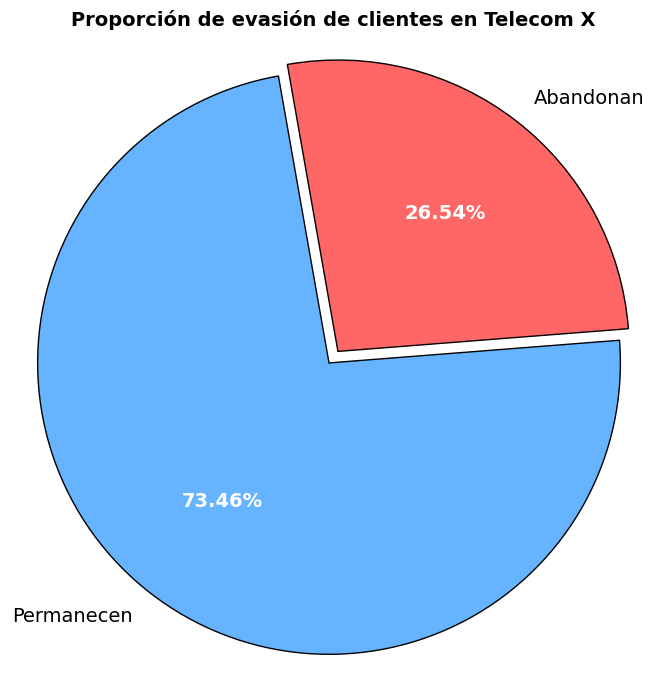

In [39]:
# Contar la cantidad de usuarios que permanecen o abandonan Telecom X
cliente_evade = df['Evasion'].value_counts()

# Crear etiquetas para el gráfico
etiquetas = ['Permanecen', 'Abandonan']

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(7, 7))

# Crear el gráfico de torta
# Guardamos los textos generados para poder modificarlos
wedges, texts, autotexts = ax.pie(
    cliente_evade,
    labels=etiquetas,
    autopct='%1.2f%%',
    startangle=100,
    colors=[color_si, color_no],
    wedgeprops={'edgecolor': 'black', 'linewidth': 1},
    explode=(0.05, 0),
    textprops= {'fontsize': 14, 'color':'black'}
)


# Personalizar solo los porcentajes (textos internos)
for autotext in autotexts:
    autotext.set_color('white')     # Color del texto dentro del gráfico
    autotext.set_fontsize(14)       # Tamaño de los porcentajes
    autotext.set_fontweight('bold') # Colocar en negrita

# Ajustes de presentación
ax.set_title('Proporción de evasión de clientes en Telecom X', fontsize=14, fontweight='bold')
ax.axis('equal')  # Asegura que el gráfico sea perfectamente circular

# Mostrar
plt.tight_layout()
plt.show()

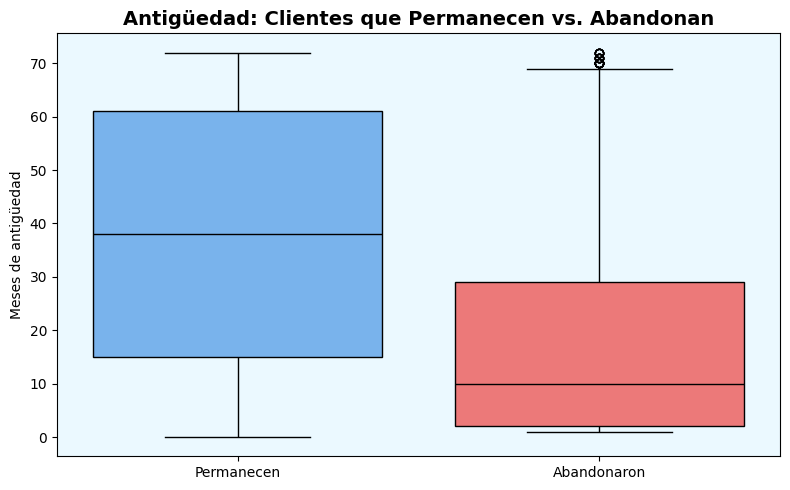

In [40]:
# Crear figura
fig, ax = plt.subplots(figsize=(8, 5))

# Boxplot con hue para evitar warning
sns.boxplot(
    data=df,
    x='Evasion',  # Compara "Sí" vs "No"
    y='MesesAntiguedad',
    hue='Evasion',
    palette={'Sí': color_no, 'No': color_si},
    ax=ax,
    boxprops=dict(edgecolor='black'),
    medianprops=dict(color='black'),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black'),
    flierprops=dict(markeredgecolor='black')
)



# Estética
ax.set_title('Antigüedad: Clientes que Permanecen vs. Abandonan',
             fontsize=14, fontweight='bold')
ax.set_xlabel('')
ax.set_ylabel('Meses de antigüedad')
ax.set_facecolor(color_interior)
# Asegura que los ticks estén fijos en 0 y 1 (posiciones de las categorías)
ax.set_xticks([0, 1])
# Asigna las etiquetas
ax.set_xticklabels(['Permanecen', 'Abandonaron'])

plt.tight_layout()
plt.show()

In [41]:
# Cantidad de clientes por género
df_evasion['Genero'].value_counts()

,count
Genero,
Femenino,939
Masculino,930


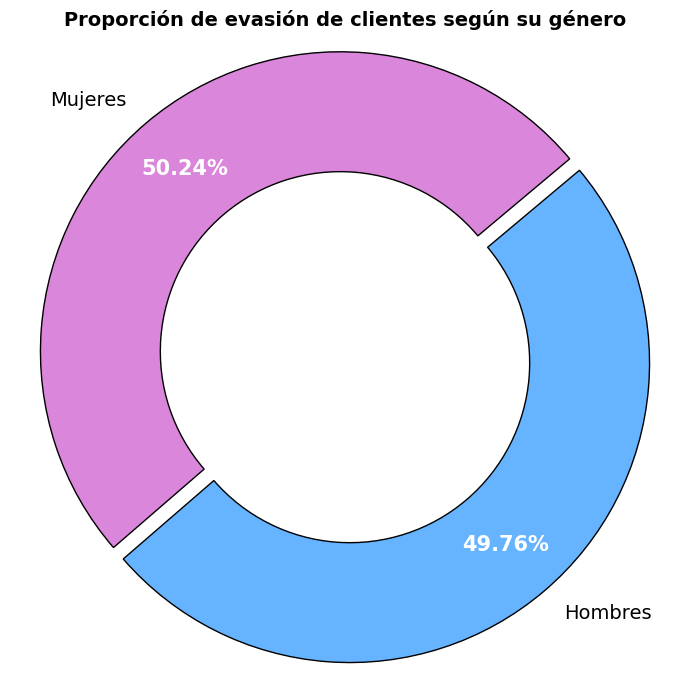

In [42]:
# Contar la cantidad de usuarios según su género
evasion_genero = df_evasion['Genero'].value_counts()

# Crear etiquetas para el gráfico
etiquetas = ['Mujeres','Hombres']

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(7, 7))

# Crear el gráfico de torta
# Guardamos los textos generados para poder modificarlos
wedges, texts, autotexts = ax.pie(
    evasion_genero,
    labels=etiquetas,
    autopct='%1.2f%%',
    startangle=40,
    colors=[color_femenino, color_masculino],
    explode=(0.05, 0),
    textprops= {'fontsize': 14, 'color':'black'},
    wedgeprops={'width': 0.4,'edgecolor': 'black', 'linewidth': 1},
    pctdistance=0.8
)

# Personalizar solo los porcentajes (textos internos)
for autotext in autotexts:
    autotext.set_color('white')     # Color del texto dentro del gráfico
    autotext.set_fontsize(15)       # Tamaño de los porcentajes
    autotext.set_fontweight('bold') # Colocar en negrita

# Ajustes de presentación
ax.set_title('Proporción de evasión de clientes según su género', fontsize=14, fontweight='bold')
ax.axis('equal')  # Asegura que el gráfico sea perfectamente circular

# Mostrar
plt.tight_layout()
plt.show()

In [43]:
# Cantidad de clientes que son o no adultos mayores
df_evasion['AdultoMayor'].value_counts()

,count
AdultoMayor,
No,1393
Sí,476


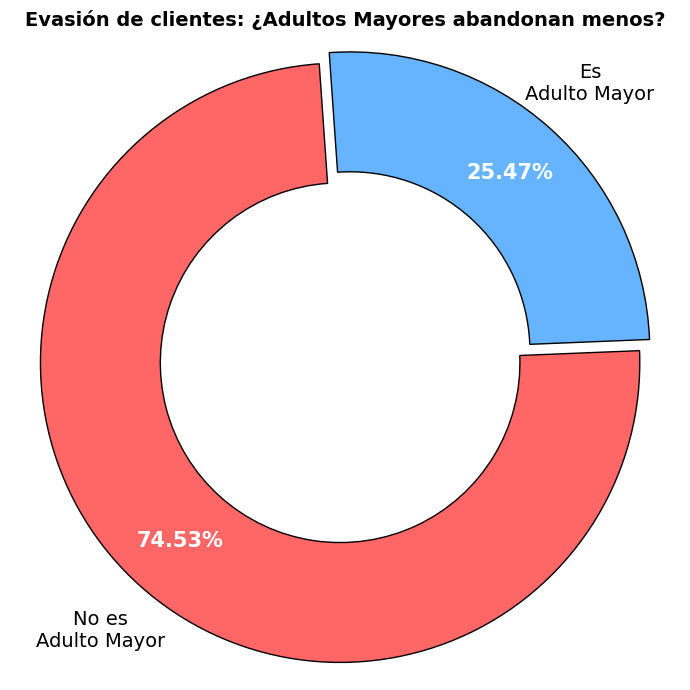

In [44]:
# Porcentaje de Evasión en Adultos Mayores
evasion_adulto_m = df_evasion['AdultoMayor'].value_counts()

# Crear etiquetas para el gráfico
etiquetas = ['No es\nAdulto Mayor','Es\nAdulto Mayor']

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(7, 7))

# Crear el gráfico de torta
# Guardamos los textos generados para poder modificarlos
wedges, texts, autotexts = ax.pie(
    evasion_adulto_m,
    labels=etiquetas,
    autopct='%1.2f%%',
    startangle=94,
    colors=[color_no,color_si],
    explode=(0.05, 0),
    textprops= {'fontsize': 14, 'color':'black','ha': 'center'},
    wedgeprops={'width': 0.4,'edgecolor': 'black', 'linewidth': 1},
    pctdistance=0.8,
    labeldistance=1.2
)

# Personalizar solo los porcentajes (textos internos)
for autotext in autotexts:
    autotext.set_color('white')     # Color del texto dentro del gráfico
    autotext.set_fontsize(15)       # Tamaño de los porcentajes
    autotext.set_fontweight('bold') # Colocar en negrita

# Ajustes de presentación
ax.set_title('Evasión de clientes: ¿Adultos Mayores abandonan menos?', fontsize=14, fontweight='bold')
ax.axis('equal')  # Asegura que el gráfico sea perfectamente circular

# Mostrar
plt.tight_layout()
plt.show()

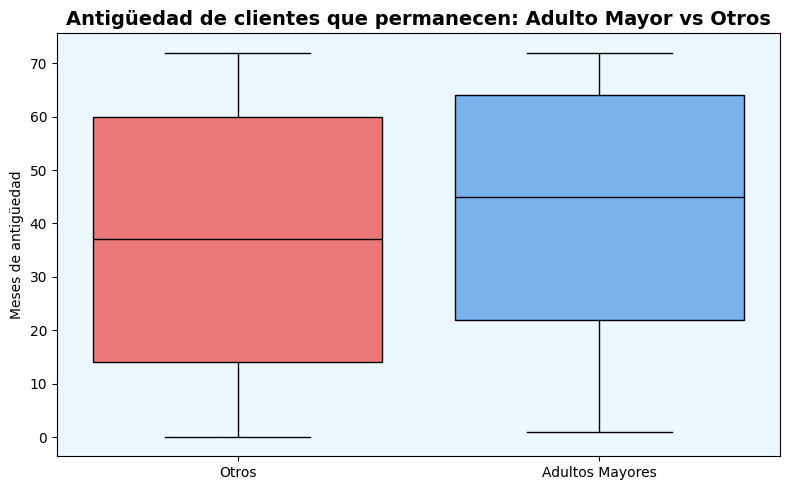

In [45]:
# Crear gráfico desde df_no_evasion con columna virtual 'GrupoEdad'
fig, ax = plt.subplots(figsize=(8, 5))

sns.boxplot(
    data=df_no_evasion.copy().assign(
        GrupoEdad=lambda df: df['AdultoMayor'].map({'Sí': 'Adultos Mayores'}).fillna('Otros')
    ),
    x='GrupoEdad',
    y='MesesAntiguedad',
    hue='GrupoEdad',  # <- necesario para evitar warning
    palette={'Adultos Mayores': color_si, 'Otros': color_no},
    legend=False,
    boxprops=dict(edgecolor='black'),
    medianprops=dict(color='black'),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black'),
    flierprops=dict(markeredgecolor='black'),
    ax=ax
)

# Estética del gráfico
ax.set_title('Antigüedad de clientes que permanecen: Adulto Mayor vs Otros',
             fontsize=14, fontweight='bold')
ax.set_xlabel('')
ax.set_ylabel('Meses de antigüedad')
ax.set_facecolor(color_interior)

plt.tight_layout()
plt.show()

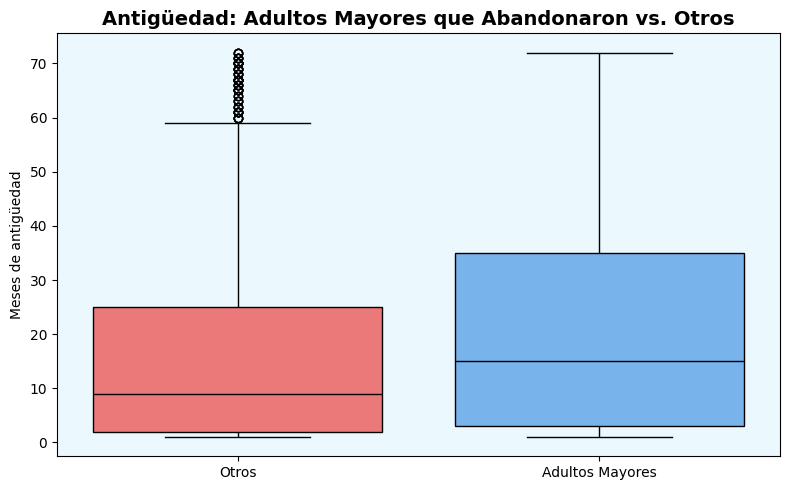

In [46]:
# Crear gráfico sin crear df_comparativo
fig, ax = plt.subplots(figsize=(8, 5))
sns.boxplot(
    data=df_evasion.copy().assign(
        Grupo=lambda df: df['AdultoMayor'].map({'Sí': 'Adultos Mayores'}).fillna('Otros')
    ),
    x='Grupo',
    y='MesesAntiguedad',
    hue='Grupo',
    palette={'Adultos Mayores': color_si, 'Otros': color_no},
    boxprops=dict(edgecolor='black'),
    medianprops=dict(color='black'),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black'),
    flierprops=dict(markeredgecolor='black'),
    ax=ax
)

# Estética
ax.set_title('Antigüedad: Adultos Mayores que Abandonaron vs. Otros',
             fontsize=14, fontweight='bold')
ax.set_xlabel('')
ax.set_ylabel('Meses de antigüedad')
ax.set_facecolor(color_interior)

plt.tight_layout()
plt.show()

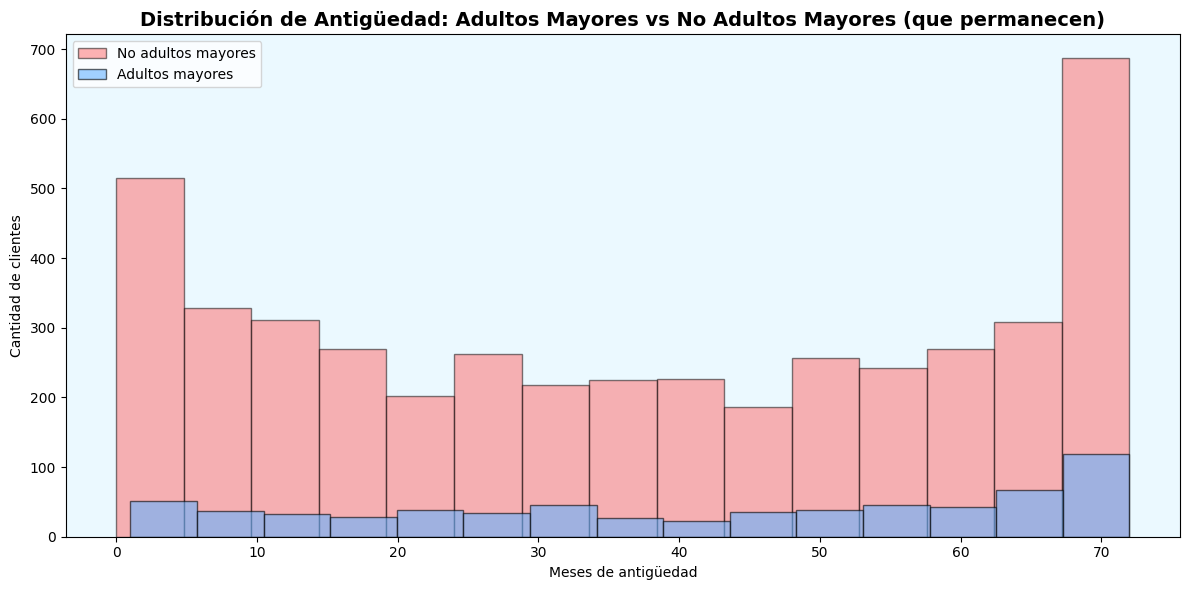

In [47]:
# Asegurarse que 'MesesAntiguedad' es numérico sin warning
df_no_evasion.loc[:, 'MesesAntiguedad'] = pd.to_numeric(df_no_evasion['MesesAntiguedad'], errors='coerce')

# Graficar histogramas comparativos
fig, ax = plt.subplots(figsize=(12, 6))

# Histograma para no adultos mayores
ax.hist(df_no_evasion[df_no_evasion['AdultoMayor'] == 'No']['MesesAntiguedad'],
        bins=15, alpha=0.5, label='No adultos mayores',
        color=color_no, edgecolor='black')

# Histograma para adultos mayores
ax.hist(df_no_evasion[df_no_evasion['AdultoMayor'] == 'Sí']['MesesAntiguedad'],
        bins=15, alpha=0.6, label='Adultos mayores',
        color=color_si, edgecolor='black')

# Estética
ax.set_title('Distribución de Antigüedad: Adultos Mayores vs No Adultos Mayores (que permanecen)',
             fontsize=14, fontweight='bold')
ax.set_xlabel('Meses de antigüedad')
ax.set_ylabel('Cantidad de clientes')
ax.set_facecolor(color_interior)
ax.legend()
plt.tight_layout()
plt.show()

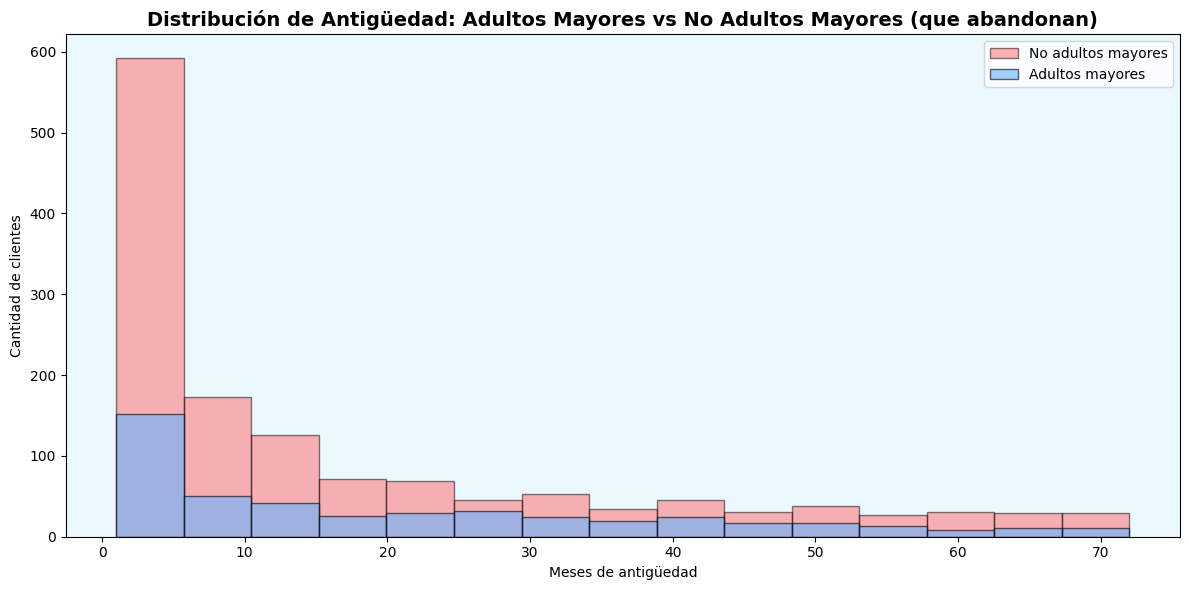

In [48]:
# Asegurar que 'MesesAntiguedad' es numérico sin warning
df_evasion.loc[:, 'MesesAntiguedad'] = pd.to_numeric(df_evasion['MesesAntiguedad'], errors='coerce')

# Graficar histogramas
fig, ax = plt.subplots(figsize=(12, 6))

# Histograma para no adultos mayores
ax.hist(df_evasion[df_evasion['AdultoMayor'] == 'No']['MesesAntiguedad'],
        bins=15, alpha=0.5, label='No adultos mayores',
        color=color_no, edgecolor='black')

# Histograma para adultos mayores
ax.hist(df_evasion[df_evasion['AdultoMayor'] == 'Sí']['MesesAntiguedad'],
        bins=15, alpha=0.6, label='Adultos mayores',
        color=color_si, edgecolor='black')

# Estética
ax.set_title('Distribución de Antigüedad: Adultos Mayores vs No Adultos Mayores (que abandonan)',
             fontsize=14, fontweight='bold')
ax.set_xlabel('Meses de antigüedad')
ax.set_ylabel('Cantidad de clientes')
ax.set_facecolor(color_interior)
ax.legend()
plt.tight_layout()
plt.show()

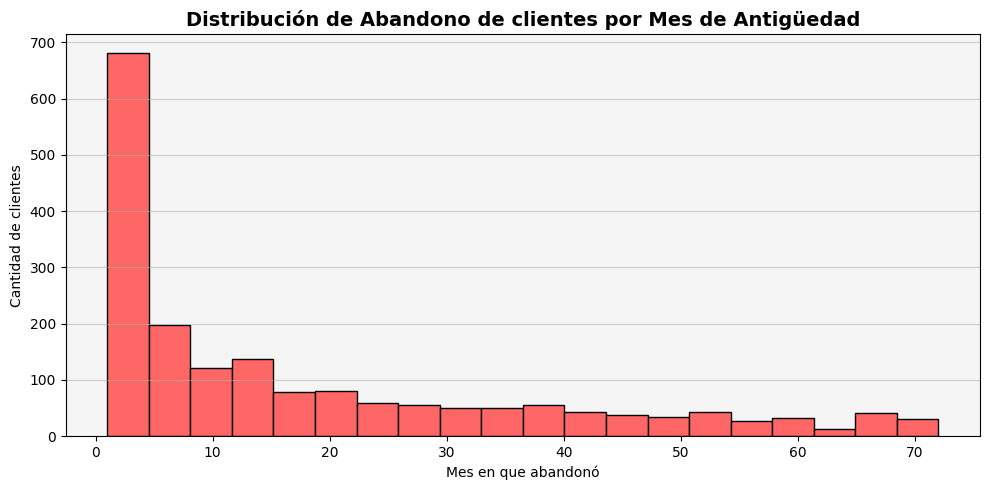

In [49]:
# Creamos el histograma directamente desde df_evasion
plt.figure(figsize=(10, 5))
plt.hist(df_evasion['MesesAntiguedad'], bins=20, color=color_no, edgecolor='black')

# Estética
plt.title('Distribución de Abandono de clientes por Mes de Antigüedad', fontsize=14, fontweight='bold')
plt.xlabel('Mes en que abandonó')
plt.ylabel('Cantidad de clientes')
plt.grid(axis='y', linestyle='-', alpha=0.6)
plt.gca().set_facecolor('#f5f5f5')  # fondo gris claro
plt.tight_layout()
plt.show()

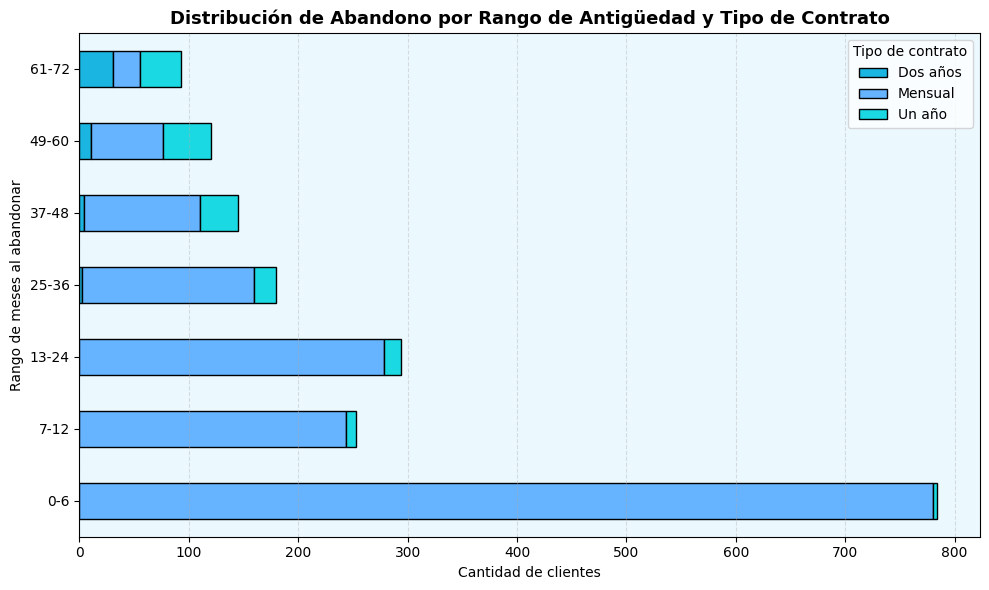

In [50]:
# Crear gráfico horizontal apilado sin variables temporales
ax = (
    df[df['Evasion'] == 'Sí'].assign(RangoAntiguedad=pd.cut(
        df[df['Evasion'] == 'Sí']['MesesAntiguedad'],
        bins=[0, 6, 12, 24, 36, 48, 60, 72],
        labels=['0-6', '7-12', '13-24', '25-36', '37-48', '49-60', '61-72'],
        include_lowest=True
    )).groupby(['RangoAntiguedad', 'TipoContrato'], observed=False).size().unstack(fill_value=0)
      .reindex(['0-6', '7-12', '13-24', '25-36', '37-48', '49-60', '61-72'])
      .plot(
        kind='barh',
        stacked=True,
        color=[color_1, color_2, color_5],
        edgecolor='black',
        figsize=(10, 6)
        )
      )

# Estética del gráfico
ax.set_title('Distribución de Abandono por Rango de Antigüedad y Tipo de Contrato', fontsize=13, fontweight='bold')
ax.set_xlabel('Cantidad de clientes')
ax.set_ylabel('Rango de meses al abandonar')
ax.set_facecolor(color_interior)
ax.grid(axis='x', linestyle='--', alpha=0.4)
ax.legend(title='Tipo de contrato', loc='upper right')
plt.tight_layout()
plt.show()

In [51]:
# Cantidad de clientes que tienen o no pareja
df_evasion['TienePareja'].value_counts()

,count
TienePareja,
No,1200
Sí,669


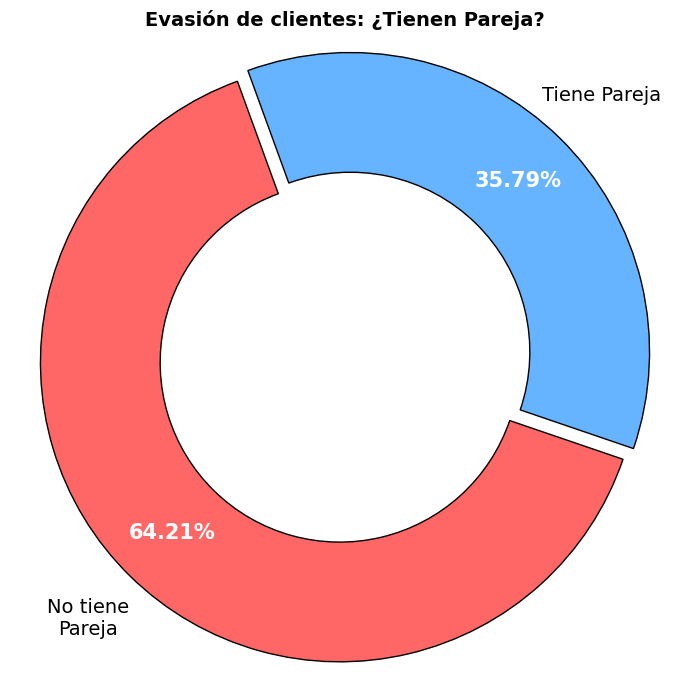

In [52]:
# Porcentaje de evasión en clientes con pareja
evasion_pareja = df_evasion['TienePareja'].value_counts()

# Crear etiquetas para el gráfico
etiquetas = ['No tiene\nPareja','Tiene Pareja']

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(7, 7))

# Crear el gráfico de torta
# Guardamos los textos generados para poder modificarlos
wedges, texts, autotexts = ax.pie(
    evasion_pareja,
    labels=etiquetas,
    autopct='%1.2f%%',
    startangle=110,
    colors=[color_no,color_si],
    explode=(0.05, 0),
    textprops= {'fontsize': 14, 'color':'black','ha': 'center'},
    wedgeprops={'width': 0.4,'edgecolor': 'black', 'linewidth': 1},
    pctdistance=0.8,
    labeldistance=1.2
)

# Personalizar solo los porcentajes (textos internos)
for autotext in autotexts:
    autotext.set_color('white')     # Color del texto dentro del gráfico
    autotext.set_fontsize(15)       # Tamaño de los porcentajes
    autotext.set_fontweight('bold') # Colocar en negrita

# Ajustes de presentación
ax.set_title('Evasión de clientes: ¿Tienen Pareja?', fontsize=14, fontweight='bold')
ax.axis('equal')  # Asegura que el gráfico sea perfectamente circular

# Mostrar
plt.tight_layout()
plt.show()

In [53]:
# Cantidad de clientes que tienen o no dependientes
df_evasion['Dependientes'].value_counts()

,count
Dependientes,
No,1543
Sí,326


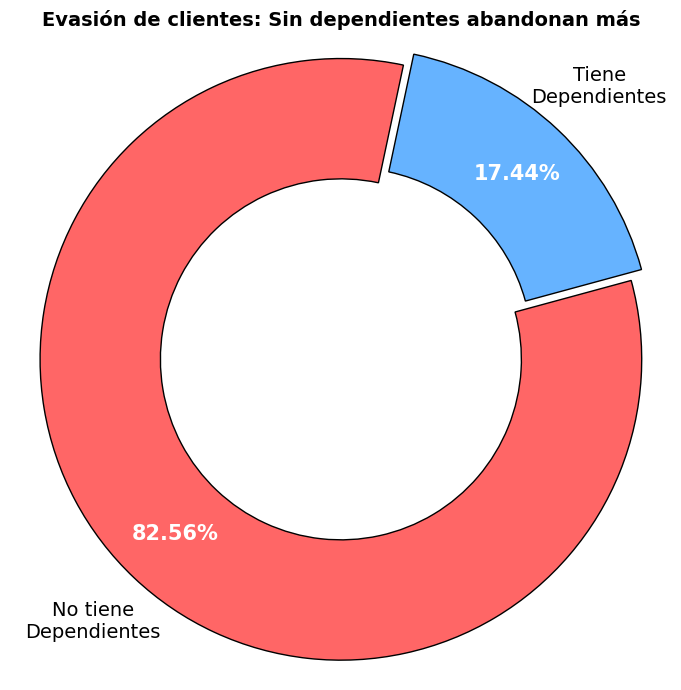

In [54]:
# Porcentaje de evasión en clientes con pareja
evasion_dependientes = df_evasion['Dependientes'].value_counts()

# Crear etiquetas para el gráfico
etiquetas = [ 'No tiene\nDependientes','Tiene\nDependientes']

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(7, 7))

# Crear el gráfico de torta
# Guardamos los textos generados para poder modificarlos
wedges, texts, autotexts = ax.pie(
    evasion_dependientes,
    labels=etiquetas,
    autopct='%1.2f%%',
    startangle=78,
    colors=[color_no, color_si],
    wedgeprops={'width': 0.4,'edgecolor': 'black', 'linewidth': 1},
    explode=(0.05, 0),
    textprops= {'fontsize': 14, 'color':'black','ha': 'center'},
    pctdistance=0.8,
    labeldistance=1.2
)

# Personalizar solo los porcentajes (textos internos)
for autotext in autotexts:
    autotext.set_color('white')     # Color del texto dentro del gráfico
    autotext.set_fontsize(15)       # Tamaño de los porcentajes
    autotext.set_fontweight('bold') # Colocar en negrita

# Ajustes de presentación
ax.set_title('Evasión de clientes: Sin dependientes abandonan más', fontsize=14, fontweight='bold')
ax.axis('equal')  # Asegura que el gráfico sea perfectamente circular

# Mostrar
plt.tight_layout()
plt.show()

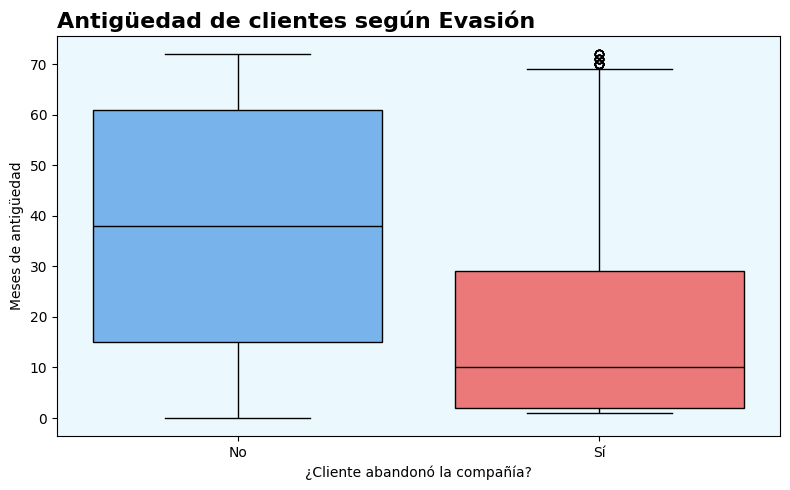

In [55]:
# Gráfico boxplot: Meses de antigüedad según evasión
fig, ax = plt.subplots(figsize=(8, 5))

# Crear boxplot con hue asignado correctamente (para evitar FutureWarning en versiones futuras)
sns.boxplot(
    data=df,
    x='Evasion',
    y='MesesAntiguedad',
    hue='Evasion',  # hue explícito
    palette={'No': color_si, 'Sí': color_no},  # colores personalizados
    legend=False,
    ax=ax,
    boxprops=dict(edgecolor='black'),
    medianprops=dict(color='black'),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black'),
    flierprops=dict(markeredgecolor='black')
)

# Fondo del gráfico
ax.set_facecolor(color_interior)

# Etiquetas y título
ax.set_title('Antigüedad de clientes según Evasión', fontsize=16, fontweight='bold', loc='left')
ax.set_xlabel('¿Cliente abandonó la compañía?')
ax.set_ylabel('Meses de antigüedad')

# Ajuste final
plt.tight_layout()
plt.show()

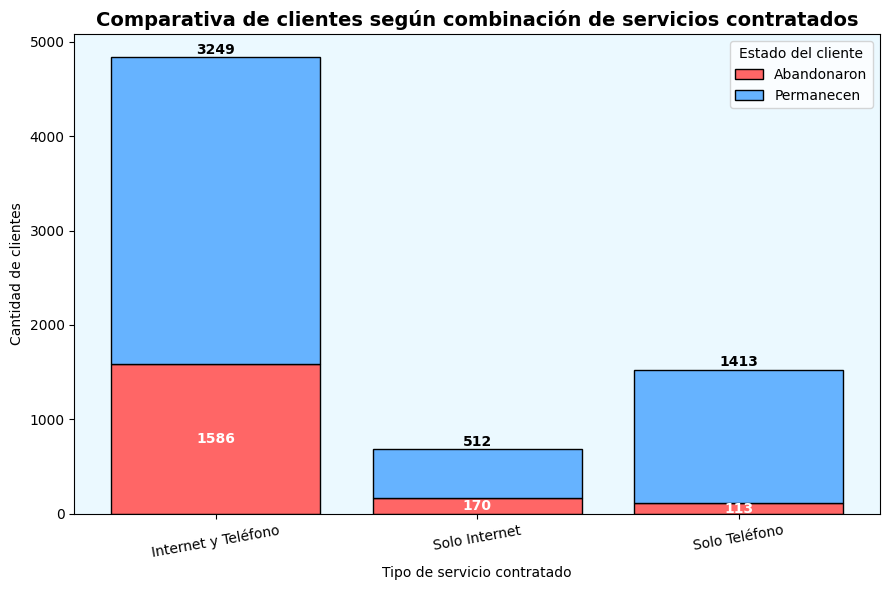

In [56]:
# Crear copia segura de los DataFrames
df_evasion = df_evasion.copy()
df_no_evasion = df_no_evasion.copy()

# Clasificación en df_evasion
cond_internet_ev = df_evasion['ServicioInternet'].isin(['DSL', 'Fibra óptica'])
cond_telefono_ev = df_evasion['ServicioTelefonico'] == 'Sí'

tipo_ev = []
for internet, telefono in zip(cond_internet_ev, cond_telefono_ev):
    if internet and telefono:
        tipo_ev.append('Internet y Teléfono')
    elif internet:
        tipo_ev.append('Solo Internet')
    elif telefono:
        tipo_ev.append('Solo Teléfono')
    else:
        tipo_ev.append('Ninguno')

df_evasion['TipoServicio'] = tipo_ev

# Clasificación en df_no_evasion
cond_internet_ne = df_no_evasion['ServicioInternet'].isin(['DSL', 'Fibra óptica'])
cond_telefono_ne = df_no_evasion['ServicioTelefonico'] == 'Sí'

tipo_ne = []
for internet, telefono in zip(cond_internet_ne, cond_telefono_ne):
    if internet and telefono:
        tipo_ne.append('Internet y Teléfono')
    elif internet:
        tipo_ne.append('Solo Internet')
    elif telefono:
        tipo_ne.append('Solo Teléfono')
    else:
        tipo_ne.append('Ninguno')

df_no_evasion['TipoServicio'] = tipo_ne

# Contar valores
conteo_evasion = df_evasion['TipoServicio'].value_counts()
conteo_no_evasion = df_no_evasion['TipoServicio'].value_counts()

# Unificar en un solo DataFrame
servicios_orden = ['Internet y Teléfono', 'Solo Internet', 'Solo Teléfono']
comparativa = pd.DataFrame({
    'Abandonaron': conteo_evasion.reindex(servicios_orden, fill_value=0),
    'Permanecen': conteo_no_evasion.reindex(servicios_orden, fill_value=0)
})

# Crear gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(9, 6))
bar1 = ax.bar(comparativa.index, comparativa['Abandonaron'], label='Abandonaron', color=color_no, edgecolor='black')
bar2 = ax.bar(comparativa.index, comparativa['Permanecen'], bottom=comparativa['Abandonaron'], label='Permanecen', color=color_si, edgecolor='black')

# Color interior
ax.set_facecolor(color_interior)

# Agregar etiquetas encima de cada bloque
for i, servicio in enumerate(comparativa.index):
    val_ab = comparativa.loc[servicio, 'Abandonaron']
    val_pe = comparativa.loc[servicio, 'Permanecen']

    # Etiqueta sobre 'Abandonaron'
    if val_ab > 0:
        ax.text(i, val_ab / 2, str(val_ab), ha='center', va='center', color='white', fontweight='bold')

    # Etiqueta sobre 'Permanecen'
    if val_pe > 0:
        ax.text(i, val_ab + val_pe + 5, str(val_pe), ha='center', va='bottom', color='black', fontweight='bold')

# Títulos y etiquetas
ax.set_title('Comparativa de clientes según combinación de servicios contratados', fontsize=14, fontweight='bold')
ax.set_ylabel('Cantidad de clientes')
ax.set_xlabel('Tipo de servicio contratado')
plt.xticks(rotation=10)
plt.legend(title='Estado del cliente')
plt.tight_layout()
plt.show()

In [57]:
df_evasion['ServicioInternet'].value_counts()


,count
ServicioInternet,
Fibra óptica,1297
DSL,459
No,113


In [58]:
df_no_evasion[df_no_evasion['ServicioInternet']=='DSL'].value_counts()

,,,,,,,,,,,,,,,,,,,,,,,count
ID_Cliente,Evasion,Genero,AdultoMayor,TienePareja,Dependientes,MesesAntiguedad,ServicioTelefonico,LineasMultiples,ServicioInternet,SeguridadEnLinea,RespaldoEnLinea,ProteccionDispositivo,SoporteTecnico,StreamingTV,StreamingPeliculas,TipoContrato,FacturaElectronica,MetodoPago,CuentasDiarias,CargoMensual,CargoTotal,TipoServicio,
9995-HOTOH,No,Masculino,No,Sí,Sí,63,No,Sin servicio telefónico,DSL,Sí,Sí,Sí,No,Sí,Sí,Dos años,No,Cheque electrónico,1.97,59.00,3707.60,Solo Internet,1
0002-ORFBO,No,Femenino,No,Sí,Sí,9,Sí,No,DSL,No,Sí,No,Sí,Sí,No,Un año,Sí,Cheque por correo,2.19,65.60,593.30,Internet y Teléfono,1
0003-MKNFE,No,Masculino,No,No,No,9,Sí,Sí,DSL,No,No,No,No,No,Sí,Mensual,No,Cheque por correo,2.00,59.90,542.40,Internet y Teléfono,1
0013-MHZWF,No,Femenino,No,No,Sí,9,Sí,No,DSL,No,No,No,Sí,Sí,Sí,Mensual,Sí,Tarjeta de crédito (automático),2.31,69.40,571.45,Internet y Teléfono,1
0015-UOCOJ,No,Femenino,Sí,No,No,7,Sí,No,DSL,Sí,No,No,No,No,No,Mensual,Sí,Cheque electrónico,1.61,48.20,340.35,Internet y Teléfono,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0082-LDZUE,No,Masculino,No,No,No,1,Sí,No,DSL,No,No,No,No,No,No,Mensual,Sí,Cheque por correo,1.48,44.30,44.30,Internet y Teléfono,1
0080-EMYVY,No,Femenino,No,No,No,14,Sí,No,DSL,No,Sí,No,No,No,No,Un año,No,Tarjeta de crédito (automático),1.72,51.45,727.85,Internet y Teléfono,1
0078-XZMHT,No,Masculino,No,Sí,No,72,Sí,Sí,DSL,No,Sí,Sí,Sí,Sí,Sí,Dos años,Sí,Transferencia bancaria (automática),2.84,85.15,6316.20,Internet y Teléfono,1


In [59]:
((df_con_internet['ServicioInternet']=='DSL') & (df_con_internet['Evasion'] == 'Sí')).sum()

np.int64(459)

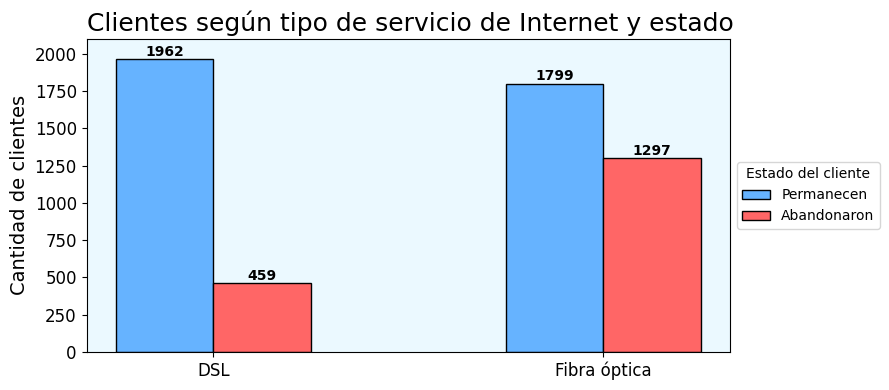

In [60]:
# Contar las combinaciones de servicio y evasión
conteo_evasion_dsl = ((df_con_internet['ServicioInternet'] == 'DSL') & (df_con_internet['Evasion'] == 'Sí')).sum()
conteo_no_evasion_dsl = ((df_con_internet['ServicioInternet'] == 'DSL') & (df_con_internet['Evasion'] == 'No')).sum()
conteo_evasion_fo = ((df_con_internet['ServicioInternet'] == 'Fibra óptica') & (df_con_internet['Evasion'] == 'Sí')).sum()
conteo_no_evasion_fo = ((df_con_internet['ServicioInternet'] == 'Fibra óptica') & (df_con_internet['Evasion'] == 'No')).sum()

# Datos organizados
labels = ['DSL', 'Fibra óptica']
abandonaron = [conteo_evasion_dsl, conteo_evasion_fo]
permanecen = [conteo_no_evasion_dsl, conteo_no_evasion_fo]

# Posiciones en el eje X
x = np.arange(len(labels))  # [0, 1]
width = 0.25  # Ancho de cada barra

# Colores definidos previamente
colores = [color_si, color_no]

# Crear gráfico
fig, ax = plt.subplots(figsize=(9, 4))

# Dibujar barras
bar1 = ax.bar(x - width/2, permanecen, width, label='Permanecen', color=color_si,edgecolor='black')
bar2 = ax.bar(x + width/2, abandonaron, width, label='Abandonaron', color=color_no,edgecolor='black')

# Color interior
ax.set_facecolor(color_interior)

# Títulos y etiquetas
ax.set_title('Clientes según tipo de servicio de Internet y estado', loc='left', fontsize=18)
ax.set_xlabel('Tipo de Internet')
ax.set_ylabel('Cantidad de clientes', fontsize=14)
ax.set_xticks(x)
ax.set_xlabel('')
ax.set_xticklabels(labels, fontsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.legend()

# Establecemos límites fijos para el eje y (de 0 a 2600)
ax.set_ylim(0, 2100)

# Posiciones en el eje X
x = np.arange(len(labels))
width = 0.10  # Reducido para acercar las barras

# Leyenda
ax.legend(title='Estado del cliente', loc='center left', bbox_to_anchor=(1, 0.5))

# Etiquetas encima de las barras
for bars in [bar1, bar2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 5, str(height),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

In [61]:
# Total de clientes por tipo de internet
total_por_tipo = df_con_internet['ServicioInternet'].value_counts()

# Clientes que abandonaron por tipo de internet
abandono_por_tipo = df_con_internet[df_con_internet['Evasion'] == 'Sí']['ServicioInternet'].value_counts()

# Proporción de evasión
proporcion_evasion = (abandono_por_tipo / total_por_tipo * 100).round(2)
print(proporcion_evasion)

ServicioInternet
Fibra óptica    41.89
DSL             18.96
Name: count, dtype: float64


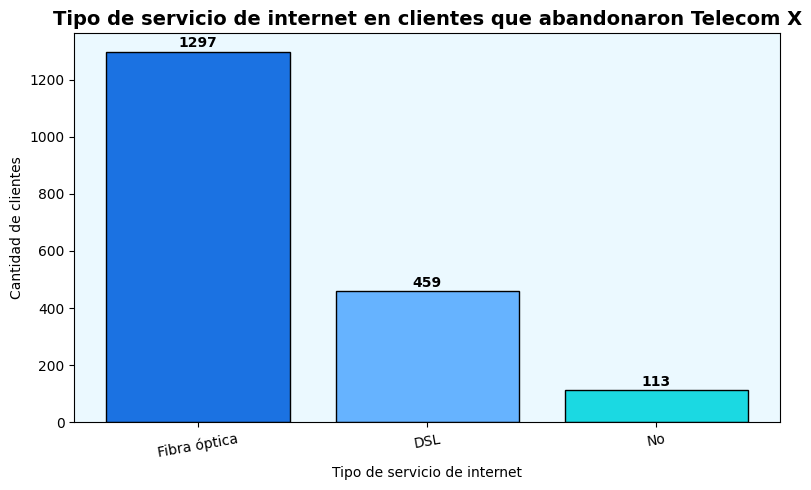

In [62]:
conteo_servicio_internet = df_evasion['ServicioInternet'].value_counts()

# Gráfico de barras
fig, ax = plt.subplots(figsize=(8, 5))
colors = [color_6, color_2, color_5]  # Asegúrate de tener definidos estos colores

bars = ax.bar(conteo_servicio_internet.index, conteo_servicio_internet.values, color=colors, edgecolor='black')

# Agregar etiquetas sobre cada barra
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 5, str(height), ha='center', va='bottom', fontweight='bold')

# Color interior
ax.set_facecolor(color_interior)

# Estética
ax.set_title('Tipo de servicio de internet en clientes que abandonaron Telecom X', fontsize=14, fontweight='bold')
ax.set_xlabel('Tipo de servicio de internet')
ax.set_ylabel('Cantidad de clientes')
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()

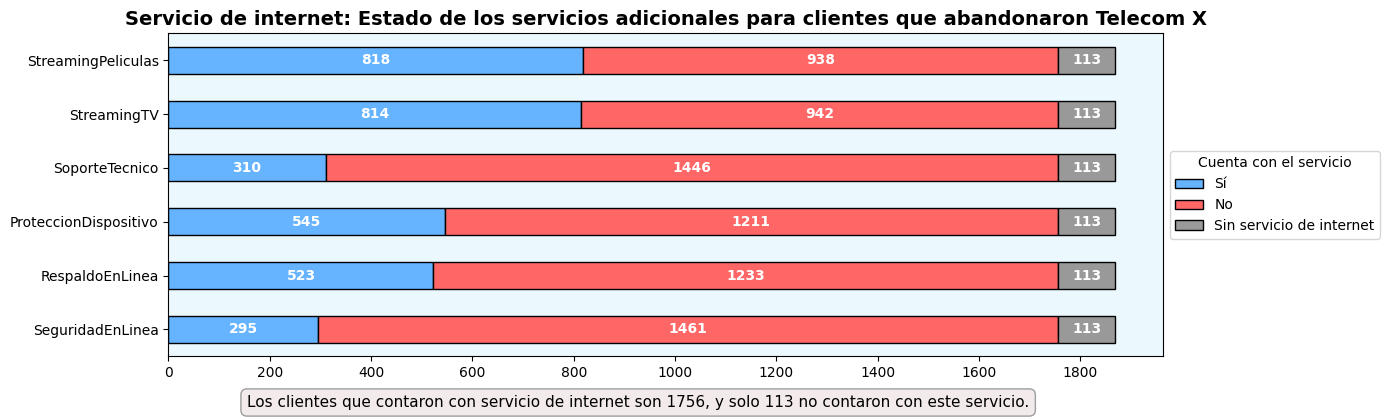

In [63]:
servicios = [
    'SeguridadEnLinea',
    'RespaldoEnLinea',
    'ProteccionDispositivo',
    'SoporteTecnico',
    'StreamingTV',
    'StreamingPeliculas'
]

# Crear DataFrame con 3 categorías bien diferenciadas
conteo_servicios = pd.DataFrame(columns=['Sí', 'No', 'Sin servicio de internet'], index=servicios)

# Rellena el DataFrame según el valor especial por columna
for col in servicios:
    conteo = df_evasion[col].value_counts()

    conteo_servicios.loc[col] = [
        conteo.get('Sí', 0),
        conteo.get('No', 0),
        conteo.get('Sin servicio de internet', 0)
    ]

# Convertimos los datos a enteros
conteo_servicios = conteo_servicios.astype(int)

# Colores diferenciados
colores = {
    'Sí': color_si,
    'No': color_no,
    'Sin servicio de internet': color_nulo_1
}



# Crear gráfico de barras horizontales apiladas
ax = conteo_servicios.plot(
    kind='barh',
    stacked=True,
    color=[colores[col] for col in conteo_servicios.columns],
    figsize=(14, 4),
    edgecolor='black'
)

# Color interior
ax.set_facecolor(color_interior)

# Separación en el rango de clientes
ax.xaxis.set_major_locator(plt.MultipleLocator(200))

# Agregar etiquetas centradas dentro de cada barra
for i, servicio in enumerate(conteo_servicios.index):
    acumulado = 0
    for estado in conteo_servicios.columns:
        valor = conteo_servicios.loc[servicio, estado]
        if valor > 0:
            ax.text(
                acumulado + valor / 2, i,             # posición X (centro del bloque), Y (índice de fila)
                str(valor),                           # texto
                ha='center', va='center',
                fontsize=10, color='white', fontweight='bold'
            )
            acumulado += valor

total_con_internet_e = ((df_evasion['ServicioInternet'] == 'DSL') | (df_evasion['ServicioInternet'] == 'Fibra óptica')).sum()
total_sin_internet_e = (df_evasion['ServicioInternet'] == 'No').sum()

texto = (
    f"Los clientes que contaron con servicio de internet son {total_con_internet_e}, "
    f"y solo {total_sin_internet_e} no contaron con este servicio."
)

# Agregar el texto en coordenadas de la figura (entre 0 y 1)
ax.figure.text(
    0.18,            # Eje X
    0,               # Eje Y
    texto,
    fontsize=11,
    color='black',
    ha='left',
    va='top',
    bbox=dict(
        boxstyle='round,pad=0.4',
        edgecolor=color_borde,
        facecolor=color_fondo,
        alpha=0.95
    )
)


# Estética
ax.set_title('Servicio de internet: Estado de los servicios adicionales para clientes que abandonaron Telecom X', fontsize=14, fontweight='bold')
ax.set_xlabel('')
ax.set_ylabel('')
plt.legend(title='Cuenta con el servicio', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

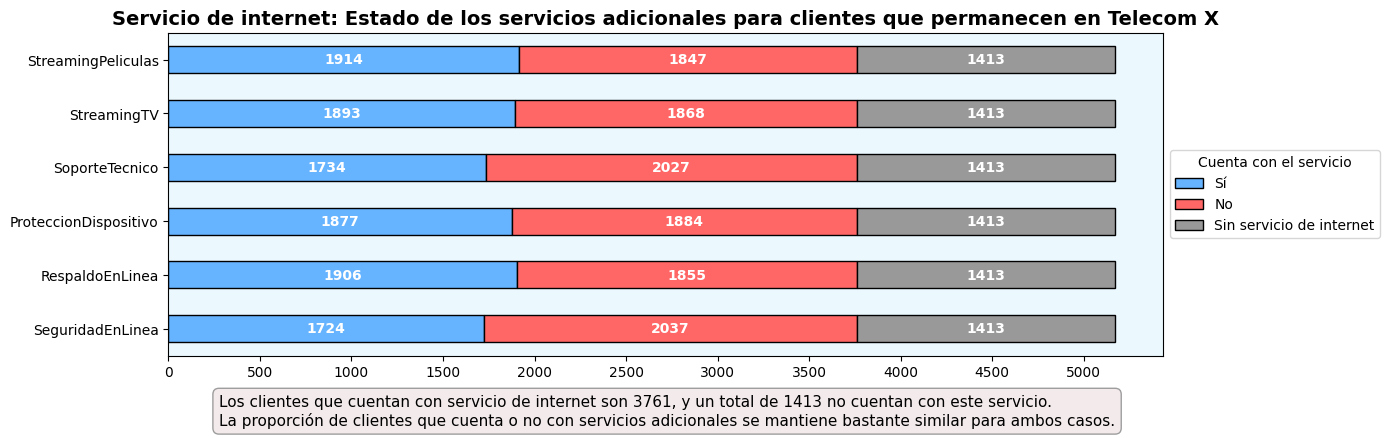

In [64]:
servicios = [
    'SeguridadEnLinea',
    'RespaldoEnLinea',
    'ProteccionDispositivo',
    'SoporteTecnico',
    'StreamingTV',
    'StreamingPeliculas'
]

# Crear DataFrame con 3 categorías bien diferenciadas
conteo_servicios = pd.DataFrame(columns=['Sí', 'No', 'Sin servicio de internet'], index=servicios)

# Rellena el DataFrame según el valor especial por columna
for col in servicios:
    conteo = df_no_evasion[col].value_counts()

    conteo_servicios.loc[col] = [
        conteo.get('Sí', 0),
        conteo.get('No', 0),
        conteo.get('Sin servicio de internet', 0)
    ]

# Convertimos los datos a enteros
conteo_servicios = conteo_servicios.astype(int)

# Colores diferenciados
colores = {
    'Sí': color_si,
    'No': color_no,
    'Sin servicio de internet': color_nulo_1
}

# Crear gráfico de barras horizontales apiladas
ax = conteo_servicios.plot(
    kind='barh',
    stacked=True,
    color=[colores[col] for col in conteo_servicios.columns],
    figsize=(14, 4),
    edgecolor='black'
)

# Color interior
ax.set_facecolor(color_interior)

# Separación en el rango de clientes
ax.xaxis.set_major_locator(plt.MultipleLocator(500))

# Agregar etiquetas centradas dentro de cada barra
for i, servicio in enumerate(conteo_servicios.index):
    acumulado = 0
    for estado in conteo_servicios.columns:
        valor = conteo_servicios.loc[servicio, estado]
        if valor > 0:
            ax.text(
                acumulado + valor / 2, i,             # posición X (centro del bloque), Y (índice de fila)
                str(valor),                           # texto
                ha='center', va='center',
                fontsize=10, color='white', fontweight='bold'
            )
            acumulado += valor

total_con_internet_ne = ((df_no_evasion['ServicioInternet'] == 'DSL') | (df_no_evasion['ServicioInternet'] == 'Fibra óptica')).sum()
total_sin_internet_ne = (df_no_evasion['ServicioInternet'] == 'No').sum()

texto = (
    f"Los clientes que cuentan con servicio de internet son {total_con_internet_ne}, "
    f"y un total de {total_sin_internet_ne} no cuentan con este servicio."
    f"\nLa proporción de clientes que cuenta o no con servicios adicionales se mantiene bastante similar para ambos casos."

)

# Agregar el texto en coordenadas de la figura (entre 0 y 1)
ax.figure.text(
    0.16,            # Eje X
    0,               # Eje Y
    texto,
    fontsize=11,
    color='black',
    ha='left',
    va='top',
    bbox=dict(
        boxstyle='round,pad=0.4',
        edgecolor=color_borde,
        facecolor=color_fondo,
        alpha=0.95
    )
)


# Estética
ax.set_title('Servicio de internet: Estado de los servicios adicionales para clientes que permanecen en Telecom X', fontsize=14, fontweight='bold')
ax.set_xlabel('')
ax.set_ylabel('')
plt.legend(title= 'Cuenta con el servicio', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

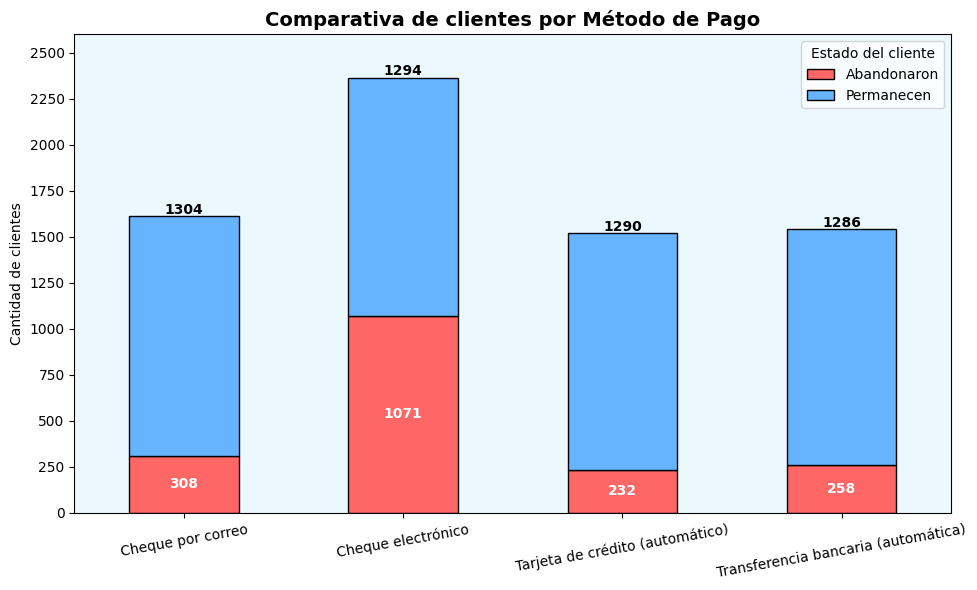

In [65]:
# Contar clientes por método de pago para ambos grupos
evasion_pago = df_evasion['MetodoPago'].value_counts()
no_evasion_pago = df_no_evasion['MetodoPago'].value_counts()

# Asegurar orden y columnas iguales
metodos_pago = [
    'Cheque por correo',
    'Cheque electrónico',
    'Tarjeta de crédito (automático)',
    'Transferencia bancaria (automática)'
]

# Crear un nuevo DataFrame con los valores alineados
comparativa_pago = pd.DataFrame({
    'Abandonaron': [evasion_pago.get(metodo, 0) for metodo in metodos_pago],
    'Permanecen': [no_evasion_pago.get(metodo, 0) for metodo in metodos_pago]
}, index=metodos_pago)

# Colores personalizados
colores = [color_no, color_si]

# Crear gráfico
ax = comparativa_pago.plot(
    kind='bar',
    stacked=True,
    color=colores,
    figsize=(10, 6),
    edgecolor='black'
)

# Color interior
ax.set_facecolor(color_interior)

# Agregar etiquetas personalizadas para cada parte
for i, metodo in enumerate(metodos_pago):
    val_abandono = comparativa_pago.loc[metodo, 'Abandonaron']
    val_permanencia = comparativa_pago.loc[metodo, 'Permanecen']

    # Etiqueta para abandonaron (parte inferior)
    if val_abandono > 0:
        ax.text(i, val_abandono/2, str(val_abandono), ha='center',
                va='center', fontsize=10, fontweight='bold', color='white')

    # Etiqueta para permanecen (parte superior)
    if val_permanencia > 0:
        ax.text(i, val_abandono + (val_permanencia - 5), str(val_permanencia),
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')




# Títulos y etiquetas
ax.set_title('Comparativa de clientes por Método de Pago', fontsize=14, fontweight='bold')
ax.set_ylabel('Cantidad de clientes')
ax.set_xlabel('')
plt.xticks(rotation=10)

# Establecemos límites fijos para el eje y (de 0 a 2600)
ax.set_ylim(0, 2600)

# Establece una separación de 250 entre cada marca del eje y
ax.yaxis.set_major_locator(plt.MultipleLocator(250))

# Leyenda y estética
plt.legend(title='Estado del cliente', loc='upper right')
plt.tight_layout()
plt.show()

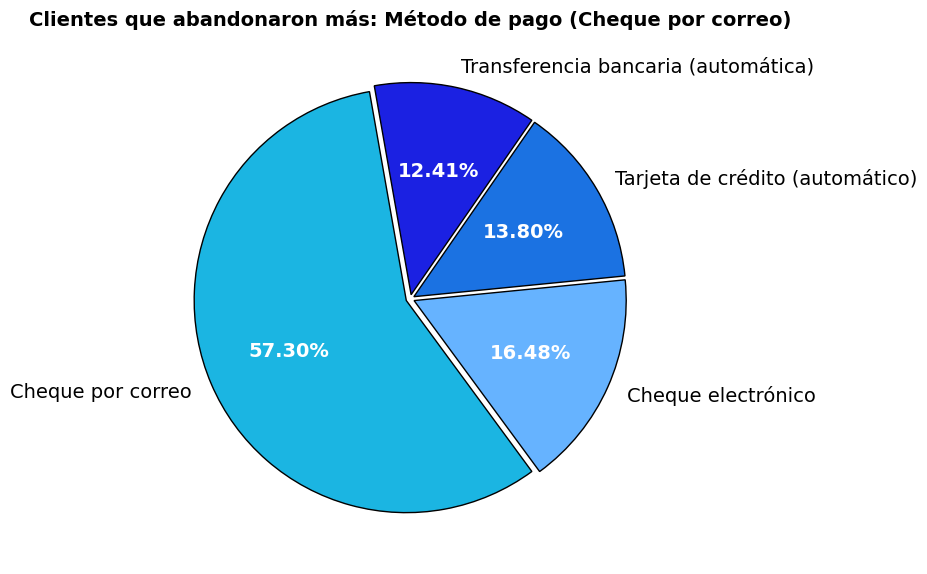

In [66]:
# Contar la cantidad de usuarios que permanecen o abandonan Telecom X
evasion_metodo_pago = df_evasion['MetodoPago'].value_counts()

# Crear etiquetas para el gráfico
etiquetas = [
    'Cheque por correo',
    'Cheque electrónico',
    'Tarjeta de crédito (automático)',
    'Transferencia bancaria (automática)'
]

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(9, 9))

# Crear el gráfico de torta
# Guardamos los textos generados para poder modificarlos
wedges, texts, autotexts = ax.pie(
    evasion_metodo_pago,
    labels=etiquetas,
    autopct='%1.2f%%',
    startangle=100,
    colors=[color_1, color_2, color_6, color_4],
    wedgeprops={'edgecolor': 'black', 'linewidth': 1},
    explode=(0.02,0.02,0.02,0.02),
    textprops= {'fontsize': 14, 'color':'black'},
    labeldistance=1.1,
)


# Personalizar solo los porcentajes (textos internos)
for autotext in autotexts:
    autotext.set_color('white')     # Color del texto dentro del gráfico
    autotext.set_fontsize(14)       # Tamaño de los porcentajes
    autotext.set_fontweight('bold') # Colocar en negrita

# Ajustes de presentación
ax.set_title('Clientes que abandonaron más: Método de pago (Cheque por correo)', fontsize=14, fontweight='bold')
#ax.axis('equal')  # Asegura que el gráfico sea perfectamente circular

# Mostrar
plt.tight_layout()
plt.show()

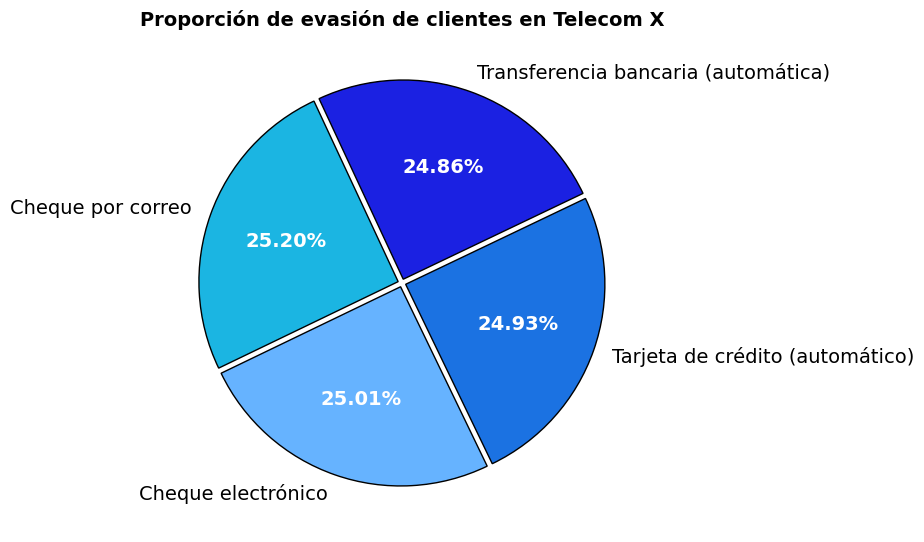

In [67]:
# Contar la cantidad de usuarios que permanecen o abandonan Telecom X
no_evasion_metodo_pago = df_no_evasion['MetodoPago'].value_counts()

# Crear etiquetas para el gráfico
etiquetas = [
    'Cheque por correo',
    'Cheque electrónico',
    'Tarjeta de crédito (automático)',
    'Transferencia bancaria (automática)'
]

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(9, 9))

# Crear el gráfico de torta
# Guardamos los textos generados para poder modificarlos
wedges, texts, autotexts = ax.pie(
    no_evasion_metodo_pago,
    labels=etiquetas,
    autopct='%1.2f%%',
    startangle=115,
    colors=[color_1, color_2, color_6, color_4],
    wedgeprops={'edgecolor': 'black', 'linewidth': 1},
    explode=(0.02,0.02,0.02,0.02),
    textprops= {'fontsize': 14, 'color':'black'}
)

# Personalizar solo los porcentajes (textos internos)
for autotext in autotexts:
    autotext.set_color('white')     # Color del texto dentro del gráfico
    autotext.set_fontsize(14)       # Tamaño de los porcentajes
    autotext.set_fontweight('bold') # Colocar en negrita

# Ajustes de presentación
ax.set_title('Proporción de evasión de clientes en Telecom X', fontsize=14, fontweight='bold')
#ax.axis('equal')  # Asegura que el gráfico sea perfectamente circular

# Mostrar
plt.tight_layout()
plt.show()

## **Informe final**

In [68]:
((df_evasion['ServicioInternet'] == 'DSL') | (df_evasion['ServicioInternet'] == 'Fibra óptica')).sum()

np.int64(1756)

In [69]:
(df_evasion['ServicioInternet'] == 'DSL').sum()

np.int64(459)

In [70]:
(df_evasion['ServicioInternet'] == 'Fibra óptica').sum()

np.int64(1297)

In [71]:
(df_evasion['ServicioInternet'] == 'No').sum()

np.int64(113)

In [72]:
(df_evasion['ServicioTelefonico'] == 'Sí').sum()


np.int64(1699)

In [73]:
(df_evasion['ServicioTelefonico'] == 'No').sum()

np.int64(170)

In [74]:
(df_evasion['ServicioInternet'] == 'Fibra óptica').sum()

np.int64(1297)

In [75]:
(df_evasion['ServicioInternet'] == 'Sin servicio de internet').sum()

np.int64(0)

In [76]:
# Contador de usuarios con Internet + Telefonía
(((df_evasion['ServicioInternet'] == 'DSL') | (df_evasion['ServicioInternet'] == 'Fibra óptica')) & (df_evasion['ServicioTelefonico'] == 'Sí')).sum()


np.int64(1586)

In [77]:
# Get the value counts for the 'ServicioInternet' column in the churned customers DataFrame
(df_evasion['ServicioInternet']== 'No').sum()


np.int64(113)

In [78]:
df_evasion['LineasMultiples'].value_counts()

,count
LineasMultiples,
Sí,850
No,849
Sin servicio telefónico,170


In [79]:
df_no_evasion['ServicioInternet'].value_counts()

,count
ServicioInternet,
DSL,1962
Fibra óptica,1799
No,1413
